In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory('C:/Users/Abd ur Rehman/Desktop/brain d/Train', target_size=(224, 224), batch_size=32,class_mode='binary')
test_generator = test_datagen.flow_from_directory('C:/Users/Abd ur Rehman/Desktop/brain d/Test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 588 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [7]:
# Load the ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [8]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [10]:
# Combine the base model and new layers into a single model
model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
19/19 [==============================] - 422s 22s/step - loss: 6.2452 - accuracy: 0.5272 - val_loss: 13.9834 - val_accuracy: 0.1391
Epoch 2/10
19/19 [==============================] - 398s 21s/step - loss: 1.0724 - accuracy: 0.7398 - val_loss: 3.1516 - val_accuracy: 0.5213
Epoch 3/10
19/19 [==============================] - 399s 22s/step - loss: 0.3633 - accuracy: 0.8622 - val_loss: 6.9080 - val_accuracy: 0.1867
Epoch 4/10
19/19 [==============================] - 392s 21s/step - loss: 0.3388 - accuracy: 0.8350 - val_loss: 4.0878 - val_accuracy: 0.5175
Epoch 5/10
19/19 [==============================] - 1730s 95s/step - loss: 0.2011 - accuracy: 0.9201 - val_loss: 5.9899 - val_accuracy: 0.4599
Epoch 6/10
19/19 [==============================] - 399s 22s/step - loss: 0.1882 - accuracy: 0.9439 - val_loss: 5.5395 - val_accuracy: 0.4712
Epoch 7/10
19/19 [==============================] - 406s 22s/step - loss: 0.1718 - accuracy: 0.9473 - val_loss: 6.6463 - val_accuracy: 0.4511
Epoc

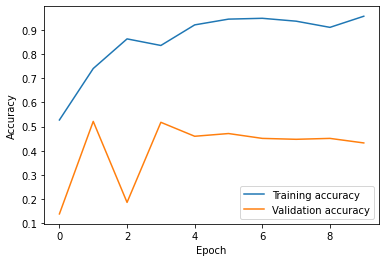

In [12]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
import numpy as np
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)   # Convert probabilities to binary predictions

# Convert the predicted probabilities to binary predictions
#y_pred = np.round(y_pred).flatten()

25/25 [==============================] - 290s 12s/step


In [15]:
# Get the true labels for the entire test dataset
y_true = test_generator.classes
# Define the class labels
#class_labels = list(test_generator.class_indices.keys())
# Calculate the metrics
class_labels = ['Class_0', 'Class_1'] 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

     Class_0       0.96      1.00      0.98       763
     Class_1       0.00      0.00      0.00        35

    accuracy                           0.96       798
   macro avg       0.48      0.50      0.49       798
weighted avg       0.91      0.96      0.93       798

Confusion Matrix:
[[763   0]
 [ 35   0]]


C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abd ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


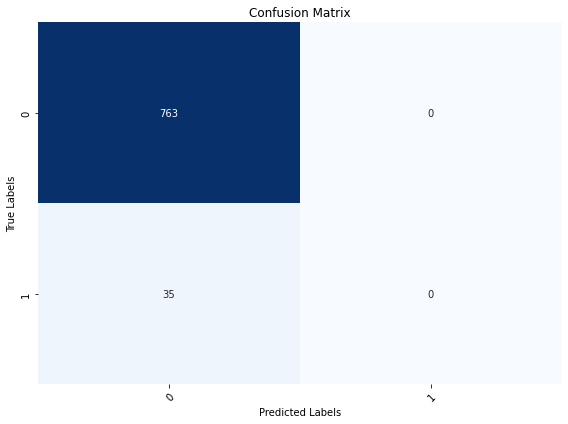

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the confusion matrix stored in the variable `cm`

# Create a list of class labels
class_labels = np.unique(y_true)

# Create a figure and axes
plt.figure(figsize=(8, 6))
ax = plt.subplot()

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Rotate tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Show the plot
plt.tight_layout()
plt.show()

1/1 [==============================] - 13s 13s/step
Stroke [0.99999976]


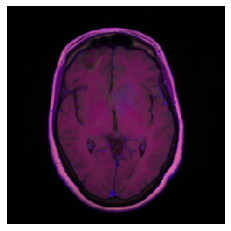

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

 #Load a test image
img_path = 'C:/Users/Abd ur Rehman/Desktop/Brain Data/Train/Stroke/tpt.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Predict the class probabilities
preds = model.predict(x)

# Print the predicted class and probability
if preds.any() > 0.5:
    print("Stroke", preds[0])
else:
    print("No Stroke", preds[0])

# Show the image with predicted label
plt.imshow(img)
plt.axis('off')
plt.show()